# Lab #4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
%matplotlib inline

# Multi-Variable

In [3]:
data = pd.read_csv(r"D:\iTi\Study\Intake 42\Numerical Optimization\HW\MultipleLR.csv", header=None)
data[len(data.columns)] = 1

In [4]:
x1 = data[4]
x2 = data[0]
x3 = data[1]
x4 = data[2]
y = data[3]

In [8]:
J_Plot = []
theta1_Plot = []
theta2_Plot = []
theta3_Plot = []
theta4_Plot = []
epoch_Plot = []

def multiVar(x1, x2, x3, x4, y):
    alpha = 0.05
    theta1 = theta2 = theta3 = theta4 = 0
    pre_error = np.inf

    for i in range(1000):
        y_Predict = theta1*x1 + theta2*x2 + theta3*x3 + theta4*x4
        err_Vec = y_Predict - y
        J_errorFunc = np.dot(err_Vec, err_Vec) / (2*(x1.size))

        J_Plot.append(J_errorFunc)
        theta1_Plot.append(theta1)
        theta2_Plot.append(theta2)
        theta2_Plot.append(theta3)
        theta2_Plot.append(theta4)

        grad_Th1 = np.dot(err_Vec, x1) / x1.size
        grad_Th2 = np.dot(err_Vec, x2) / x2.size
        grad_Th3 = np.dot(err_Vec, x3) / x3.size
        grad_Th4 = np.dot(err_Vec, x4) / x4.size

        theta1 = theta1 - alpha*grad_Th1
        theta2 = theta2 - alpha*grad_Th2
        theta3 = theta3 - alpha*grad_Th3
        theta4 = theta4 - alpha*grad_Th4

        epoch_Plot.append(i)

        if (pre_error - J_errorFunc) < 0.001:
            break
        pre_error = J_errorFunc
            
    return (theta1, theta2, theta3, theta4)

In [9]:
l1, l2, l3, l4 = multiVar(x1=x1, x2=x2, x3=x3, x4=x4, y=y)
y_Pre_F = l1*x1 + l2*x2 + l3*x3 + l4*x4

In [ ]:
plt.scatter(x_Data, y_Data)
plt.plot(x_Data, y_Pre_F)
plt.show()

In [12]:
# yi = a*xi + b (and a = -1, b = 2)
x_Data = np.linspace(start=0, stop=20, num=50)
np.random.shuffle(x_Data)
y_Data = -1*x_Data + 2

# Adagrad

In [46]:
J_Plot = []
theta0_Plot = []
theta1_Plot = []
epoch_Plot = []

def ADAGRAD(x_data, y_data):
    alpha = 0.055
    epsilon = 10**-8
    theta0 = theta1 = 0
    vt0 = vt1 = 0
    pre_error = np.inf

    for i in range(1000):
        y_Predict = theta0 + theta1*x_data
        err_Vec = y_Predict - y_data
        J_errorFunc = np.dot(err_Vec, err_Vec) / (2*(x_data.size))

        J_Plot.append(J_errorFunc)
        theta0_Plot.append(theta0)
        theta1_Plot.append(theta1)

        grad_Th0 = np.sum(err_Vec) / x_data.size
        grad_Th1 = np.sum(np.dot(err_Vec, x_data)) / x_data.size

        vt0 = vt0 + grad_Th0**2
        vt1 = vt1 + grad_Th1**2

        theta0 = theta0 - (alpha/(np.sqrt(vt0) + epsilon))*grad_Th0
        theta1 = theta1 - (alpha/np.sqrt(vt1))*grad_Th1

        epoch_Plot.append(i)

        if (pre_error - J_errorFunc) < 0.001:
            break
        pre_error = J_errorFunc
    
            
    return (theta0, theta1)

In [47]:
l0, l1 = ADAGRAD(x_data=x_Data, y_data=y_Data)
y_Pre_F = l0 + l1*x_Data

In [48]:
print(J_Plot[0])
print(J_Plot[-1])

49.34693877551021
0.8770444016915923


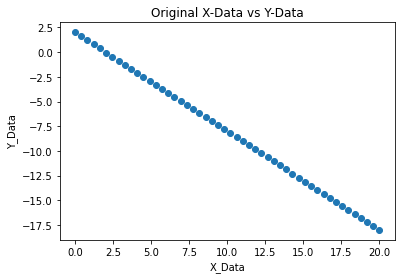

In [49]:
plt.scatter(x_Data, y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.title("Original X-Data vs Y-Data")
plt.show()

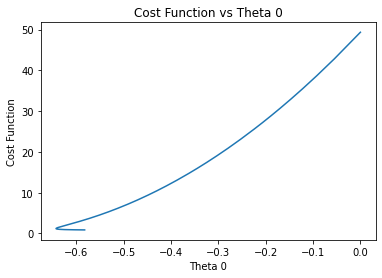

In [50]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 0")
plt.plot(theta0_Plot, J_Plot)
plt.show()

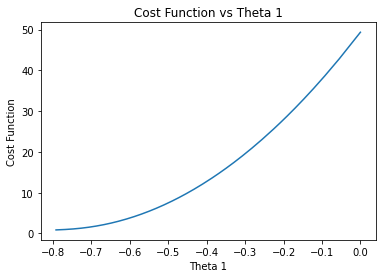

In [51]:
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 1")
plt.plot(theta1_Plot, J_Plot)
plt.show()

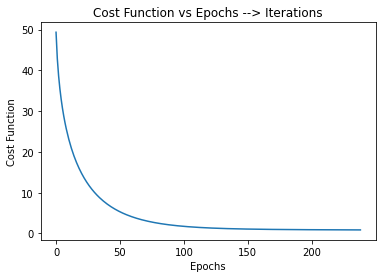

In [52]:
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Epochs --> Iterations")
plt.plot(epoch_Plot, J_Plot)
plt.show()

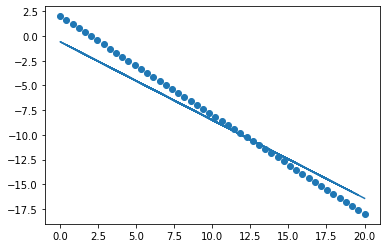

In [53]:
plt.scatter(x_Data, y_Data)
plt.plot(x_Data, y_Pre_F)
plt.show()

In [54]:
r2_score(y_Pre_F, y_Data)

0.9195174653231473

# RMSProp

In [102]:
J_Plot = []
theta0_Plot = []
theta1_Plot = []
epoch_Plot = []

def RMSProp(x_data, y_data):
    alpha = 0.06
    beta = 0.5
    theta0 = theta1 = 0
    vt0 = vt1 = 0
    pre_error = np.inf

    for i in range(1000):
        y_Predict = theta0 + theta1*x_data
        err_Vec = y_Predict - y_data
        J_errorFunc = np.dot(err_Vec, err_Vec) / (2*(x_data.size))

        J_Plot.append(J_errorFunc)
        theta0_Plot.append(theta0)
        theta1_Plot.append(theta1)

        grad_Th0 = np.sum(err_Vec) / x_data.size
        grad_Th1 = np.sum(np.dot(err_Vec, x_data)) / x_data.size

        vt0 = beta * vt0 + (1 - beta) * grad_Th0**2
        vt1 = beta * vt1 + (1 - beta) * grad_Th1**2

        theta0 = theta0 - (alpha/np.sqrt(vt0))*grad_Th0
        theta1 = theta1 - (alpha/np.sqrt(vt1))*grad_Th1

        epoch_Plot.append(i)

        if (pre_error - J_errorFunc) < 0.001:
            break
        pre_error = J_errorFunc
    
            
    return (theta0, theta1)

In [103]:
l0, l1 = RMSProp(x_data=x_Data, y_data=y_Data)
y_Pre_F = l0 + l1*x_Data

In [104]:
print(J_Plot[0])
print(J_Plot[-1])

49.34693877551022
0.8783321129282642


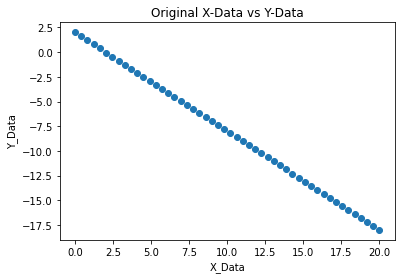

In [81]:
plt.scatter(x_Data, y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.title("Original X-Data vs Y-Data")
plt.show()

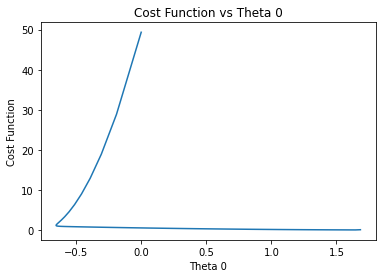

In [82]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 0")
plt.plot(theta0_Plot, J_Plot)
plt.show()

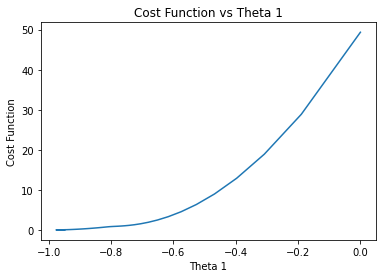

In [83]:
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 1")
plt.plot(theta1_Plot, J_Plot)
plt.show()

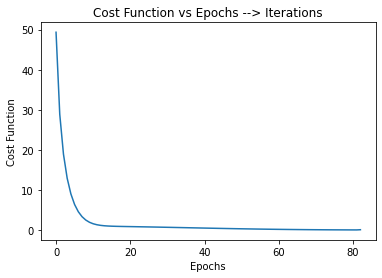

In [84]:
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Epochs --> Iterations")
plt.plot(epoch_Plot, J_Plot)
plt.show()

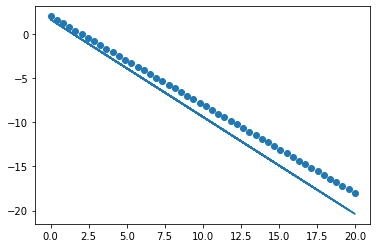

In [85]:
plt.scatter(x_Data, y_Data)
plt.plot(x_Data, y_Pre_F)
plt.show()

In [87]:
r2_score(y_Pre_F, y_Data)

0.9468405326383174

# Adam

In [203]:
J_Plot = []
theta0_Plot = []
theta1_Plot = []
epoch_Plot = []

def ADAM(x_data, y_data):
    alpha = 0.0037
    beta1 = 0.9
    beta2 = 0.999
    theta0 = theta1 = 0
    mh0 = mh1 = vt0 = vt1 = 0
    pre_error = np.inf

    for i in range(1000):
        y_Predict = theta0 + theta1*x_data
        err_Vec = y_Predict - y_data
        J_errorFunc = np.dot(err_Vec, err_Vec) / (2*(x_data.size))

        J_Plot.append(J_errorFunc)
        theta0_Plot.append(theta0)
        theta1_Plot.append(theta1)

        grad_Th0 = np.sum(err_Vec) / x_data.size
        grad_Th1 = np.sum(np.dot(err_Vec, x_data)) / x_data.size

        mh0 = beta1*mh0 + (1-beta1)*grad_Th0
        mh1 = beta1*mh1 + (1-beta1)*grad_Th1

        vt0 = beta2 * vt0 + (1 - beta2) * grad_Th0**2
        vt1 = beta2 * vt1 + (1 - beta2) * grad_Th1**2

        theta0 = theta0 - (alpha/np.sqrt(vt0))*mh0
        theta1 = theta1 - (alpha/np.sqrt(vt1))*mh1

        epoch_Plot.append(i)

        if (pre_error - J_errorFunc) < 0.001:
            break
        pre_error = J_errorFunc
    
            
    return (theta0, theta1)

In [204]:
l0, l1 = ADAM(x_data=x_Data, y_data=y_Data)
y_Pre_F = l0 + l1*x_Data

In [205]:
print(J_Plot[0])
print(J_Plot[-1])

49.34693877551022
0.4424804097385352


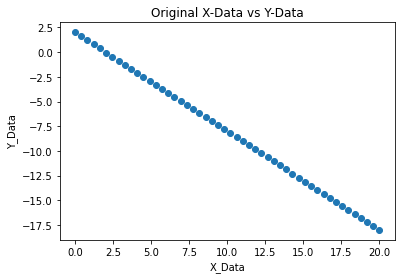

In [206]:
plt.scatter(x_Data, y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.title("Original X-Data vs Y-Data")
plt.show()

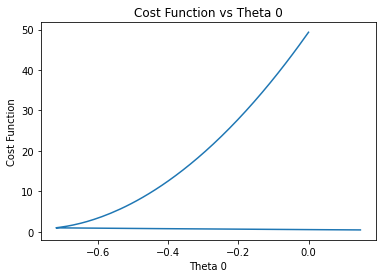

In [207]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 0")
plt.plot(theta0_Plot, J_Plot)
plt.show()

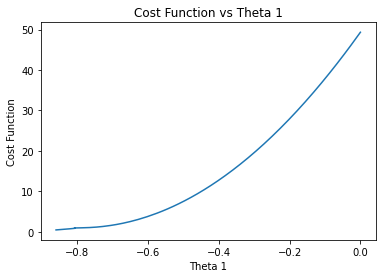

In [208]:
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 1")
plt.plot(theta1_Plot, J_Plot)
plt.show()

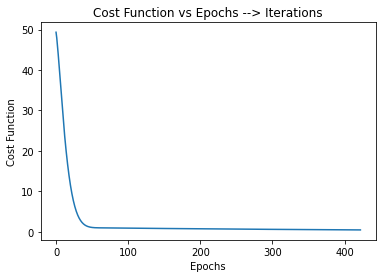

In [209]:
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Epochs --> Iterations")
plt.plot(epoch_Plot, J_Plot)
plt.show()

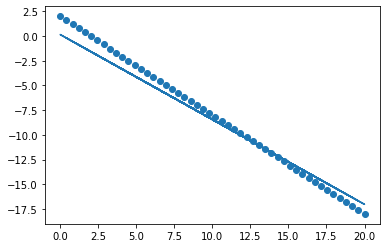

In [210]:
plt.scatter(x_Data, y_Data)
plt.plot(x_Data, y_Pre_F)
plt.show()

In [211]:
r2_score(y_Pre_F, y_Data)

0.9655251082206893